In [137]:
# reload notebook
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import os 
import sys 
from scipy import ndimage
sys.path.append("/scr/aliang80/changepoint_aug/")
os.environ["MUJOCO_GL"] = "egl"
from env_utils import create_single_env

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[-0.00775047  0.5807438   0.19428075  1.          0.20468587  0.59685409
  0.01994547] [0.00925671 0.77327284 0.1       ]
[-0.00775047  0.5807438   0.19428075  1.          0.20468587  0.59685409
  0.01994547] [0.00925671 0.77327284 0.1       ]
[0.00925671 0.77327284 0.1       ]


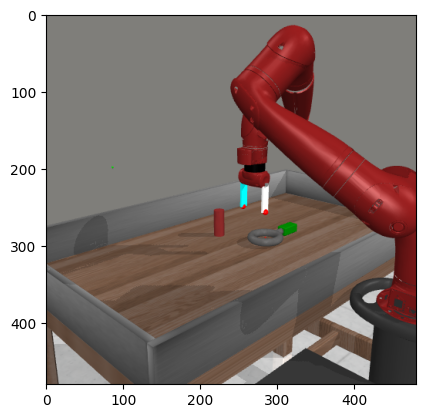

In [187]:
env = create_single_env("metaworld-assembly-v2", seed=8, image_based=False)

obs, info = env.reset()
print(obs[:7], obs[-3:])

obs, info = env.reset()
print(obs[:7], obs[-3:])
# env_state = env.get_env_state()
img = env.render()
img = ndimage.rotate(img, 180)
plt.imshow(img)

obs, *_ = env.step(env.action_space.sample())
print(obs[-3:])
qpos, qvel = env.get_env_state()
last_rand_vec = env.unwrapped._last_rand_vec
task = env.unwrapped._target_pos

In [9]:
from imitation.data import serialize
import os
root_dir  = "/scr/aliang80/changepoint_aug"
dataset_file = "datasets/expert_dataset/image_True/assembly-v2_100_noise_0.3"
print("load dataset from ", dataset_file)
dataset_file = os.path.join(root_dir, dataset_file)
expert_trajectories = serialize.load(dataset_file)
print("number of expert trajectories: ", len(expert_trajectories))


/scr/aliang80/metaworld_sac/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


load dataset from  datasets/expert_dataset/image_True/assembly-v2_100_noise_0.3
number of expert trajectories:  100


In [24]:
cp_timesteps = []
for trajectory in expert_trajectories:
    num_timesteps = len(trajectory.obs)
    found_cp = False
    for timestep in range(num_timesteps):
        # get the steps right before picking up the object
        if (
            trajectory.infos[timestep]["grasp_reward"] > 0.4
            and not trajectory.infos[timestep]["grasp_success"]
        ):
            found_cp = True
            break
        # if trajectory.infos[timestep]["in_place_reward"] > 0.4:
        #     found_cp = True
        #     break
    if found_cp:
        cp_timesteps.append(timestep)
    else:
        cp_timesteps.append(-1)

In [13]:
expert_trajectories[0].infos[23]

{'success': 0.0,
 'near_object': 0.9993526172637128,
 'grasp_success': False,
 'grasp_reward': 0.4185516177866672,
 'in_place_reward': 0.06923506529402766,
 'obj_to_target': 0,
 'unscaled_reward': 1.2517027716381977,
 'state': array([1.16023461e-01, 6.09308282e-01, 8.59269814e-02, 8.65810750e-01,
        1.29999986e-01, 6.00000025e-01, 1.89434764e-02, 7.07106761e-01,
        1.36436823e-04, 1.60137247e-04, 7.07106770e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.16447806e-01, 6.09274958e-01,
        9.21086109e-02, 8.91749608e-01, 1.29999986e-01, 6.00000025e-01,
        1.89434713e-02, 7.07106761e-01, 1.36436231e-04, 1.60136631e-04,
        7.07106770e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.32560513e-02, 7.79143543e-01, 1.00000001e-01]),
 'qpos': array([ 1.64052045e+00, -4.98114872e-01, -7.72011774e-01,  

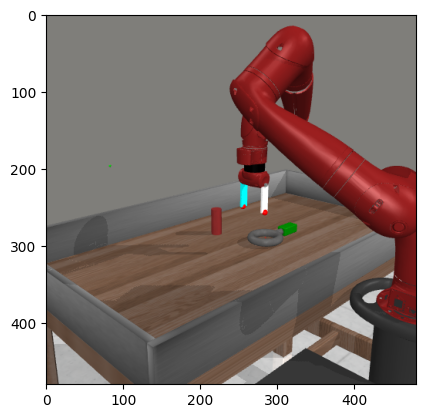

In [188]:
env = create_single_env("metaworld-assembly-v2", seed=0, image_based=False, noise_std=0.3)
obs, _ = env.reset()
# print(obs.shape)
# print(obs)
# prev_obs = expert_trajectories[0].infos[22]['state']
# # print(prev_obs)
# info = expert_trajectories[0].infos[23]
# orig_state = expert_trajectories[0].infos[23]['state']
# print(info["task"])
# print(orig_state)
env.unwrapped._freeze_rand_vec = True
env.unwrapped._last_rand_vec = last_rand_vec
env.unwrapped._target_pos = task
# env.unwrapped._last_rand_vec = info["last_rand_vec"]
# env.unwrapped._target_pos = info["task"]
# env.reset_model()
# qpos = info["qpos"]
# qvel = info["qvel"]

env.set_env_state((qpos, qvel))
# env.unwrapped._prev_obs = prev_obs
# new_obs = env.unwrapped._get_obs()
# print(new_obs)
img = env.render()
# print(img)
img = ndimage.rotate(img, 180)
plt.imshow(img)

In [22]:
dir(env.unwrapped)

['TARGET_RADIUS',
 'WRENCH_HANDLE_LENGTH',
 '_HAND_SPACE',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_did_see_sim_exception',
 '_ezpickle_args',
 '_ezpickle_kwargs',
 '_freeze_rand_vec',
 '_get_curr_obs_combined_no_goal',
 '_get_id_main_object',
 '_get_obs',
 '_get_obs_dict',
 '_get_pos_goal',
 '_get_pos_objects',
 '_get_quat_objects',
 '_get_reset_info',
 '_get_site_pos',
 '_get_state_rand_vec',
 '_gripper_caging_reward',
 '_initialize_simulation',
 '_is_protocol',
 '_last_rand_vec',
 '_last_stable_obs',
 '_n

In [31]:
env.unwrapped.evaluate_state(env.unwrapped._get_obs(), env.action_space.sample())

(1.2971482604645024,
 {'success': 0.0,
  'near_object': 0.9993526170065807,
  'grasp_success': False,
  'grasp_reward': 0.4273546626784298,
  'in_place_reward': 0.07387987180409458,
  'obj_to_target': 0,
  'unscaled_reward': 1.2971482604645024})

In [ ]:
for _ in range(10):
    rand_action = env.action_space.sample() * 0
    # rand_action[-1] = 0
    obs, _, _, _, _ = env.step(rand_action)

img = env.render()
img = ndimage.rotate(img, 180)
plt.imshow(img)

In [ ]:
# load trained BC policy